## 모델링 하기

#### 컬럼 : T-Shir, Pullover, Shirt

#### 사용모델 : VGGNet

#### 이미지강화 사용 : True

In [1]:
#라이브러리 가져오기
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np행렬 생략 부분 출력 펼쳐서 보기 옵션
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [2]:
#데이터 분류하기
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# sorting based on index
idx = np.argsort(train_labels)
train_images = train_images[idx]
train_labels = train_labels[idx]

idx = np.argsort(test_labels)
test_images = test_images[idx]
test_labels = test_labels[idx]

labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", 
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label_mapping = dict(zip(labels, range(10)))

def get_data(mapping, classes):
    # X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])
    X_train, X_test, y_train, y_test = [],[],[],[]
    for cls in classes:
        idx = mapping[cls]
        start = idx*6000
        end = idx*6000+6000
        X_train.append(train_images[start: end])
        # X_train = np.append(X_train, train_images[start: end])
        y_train.append(train_labels[start: end])
        # y_train = np.append(X_train, train_labels[start: end])
        start = idx*1000
        end = idx*1000+1000
        X_test.append(test_images[start: end])
        # X_test = np.append(X_test, test_images[start: end])
        y_test.append(test_labels[start: end])
        # y_test = np.append(y_test, test_labels[start: end])
    return X_train, X_test, y_train, y_test


train_X, test_X, train_Y, test_Y = get_data(label_mapping, 
                                            classes=["T-Shirt", "Sneaker", "Shirt"])

test_Y

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [3]:
#레이어 넘버 변환
empty_array1 = np.array([])
# print(type(d))
for arr in test_Y:
    if arr[0] == 7:
        arr[:] = 1

    elif arr[0] == 6:
        arr[:] = 2

    # print(type(arr))
    empty_array1 = np.append(empty_array1,arr)
test_Y = empty_array1

# train_Y 5개의 어레이를 1개의 어레이로 만들기
empty_array2 = np.array([])

for arr in train_Y:
    if arr[0] == 7:
        arr[:] = 1

    elif arr[0] == 6:
        arr[:] = 2

    empty_array2 = np.append(empty_array2, arr)
train_Y = empty_array2

test_Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [4]:
#test_X 리스트를 하나의 array로 만들기

for idx, img in enumerate(test_X):
    if idx == 0 :
        test_img0 = img
    elif idx == 1:
        test_img1 = img
    else:
        test_img2 = img
print(test_img0.shape, test_img1.shape, test_img2.shape)

# train_X 리스트를 하나의 array로 만들어 주기 위해서 컬럼 별로 나누는 과정
for idx, img in enumerate(train_X):
    if idx == 0 :
        train_img0 = img
    elif idx == 1:
        train_img1 = img
    else:
        train_img2 = img
print(train_img0.shape, train_img1.shape, train_img2.shape)


(1000, 28, 28) (1000, 28, 28) (1000, 28, 28)
(6000, 28, 28) (6000, 28, 28) (6000, 28, 28)


In [5]:
# test_X 하나로 합쳐주는 과정 1번만 진행 해야 합니다.
test_img0 = np.vstack((test_img0, test_img1))
test_X = np.vstack((test_img0, test_img2))

# train_X 하나로 합쳐주는 과정
train_img0 = np.vstack((train_img0, train_img1))
train_X = np.vstack((train_img0, train_img2))

print(train_X.shape, test_X.shape)

(18000, 28, 28) (3000, 28, 28)


In [6]:
#shuffle 해주기
from sklearn.utils import shuffle
train_X, train_Y = shuffle(train_X, train_Y)
test_X, test_Y = shuffle(test_X, test_Y)

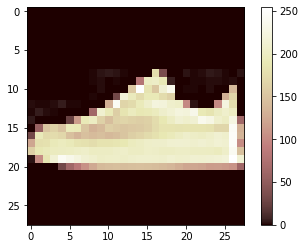

In [7]:
plt.imshow(train_X[2], cmap='pink')
plt.colorbar()
plt.show()
# print('정답범주', train_Y[2])

In [8]:
# 밑에 vggnet 모방 코드 사용 하려면 여기 셀 실행 해야함/ input 을 맞춰주기 위함.

print(train_X.shape, test_X.shape)
# (미니배치크기, 입력이미지행수, 입력이미지열수, 입력이미지체널수)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

(18000, 28, 28) (3000, 28, 28)
(18000, 28, 28, 1) (3000, 28, 28, 1)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
rotation_range = 10,
zoom_range = 0.10,
shear_range = 0.5,
width_shift_range = 0.10,
height_shift_range = 0.10,
horizontal_flip = True,
vertical_flip = False)

augment_size = 6000
# 원본 이미지 무작위 선택 및 데이터 복사
x_choice = np.random.choice(train_X.shape[0], size = augment_size, replace=False)
x_augmented = train_X[x_choice].copy()
y_augmented = train_Y[x_choice].copy()
# 이미지를 변형할 원본 이미지를 찾기 위한 함수 예제 (중복허용O / 중복허용x)
print(np.random.randint(train_X.shape[0], size = augment_size))
print(np.random.choice(train_X.shape[0], size = augment_size, replace=False))


[ 5087  5145 16384 15690   236  1076  6968 16177 10807 13361 12147  2474  6874  1358 13933 14974   173 15589   446 10228   197 10476  6023 10048  7188 11058 10239 13844   528 16938  2492  8108  6505  9765 11330 13141  7640  2175  2810 15370  8694  3367 17597 13969  1529  6774 13037 13387  7951 10407  9212  6854 16276 13029  4831 16018 15776  3629  6881 12261 11901  4048 13717 17626  4478  6211  9485 17569  3306   853   460 13403  4344  9132 14971  9416  7073 14323 14590 14657   562 16392 13668 15874 14160 17184 16061  8908 12506  2629 17391  4395 15830   954 11112 16514  9623 13607  3629 13520 14493  7671  9913  2415 17100  4718  4472  1496  3616 11519  1467 10575 14418  4862 15160   422  8012 15195 16250  5752  8357  7669  2029  6698 15302  8445  2374 10014 16028  6315 17411 10630 13203 15048 16253  6375  4251 17500  5062 16193  1942 11538 12659 10867 13866 13357  3629  9571  4883  5566  3404 15927 15893 15858 14296  2105 15161 15292  7493 11314  5502  7478   899  7363 11011  3275  49

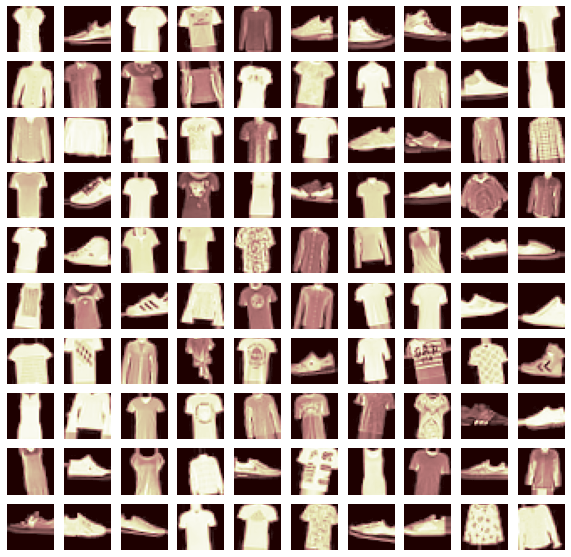

In [10]:
# 보강 이미지 데이터 생성
x_augmented = image_generator.flow(x = x_augmented,
y = np.zeros(augment_size),
batch_size = augment_size,
shuffle = False).next()[0]
#보강 이미지 확인
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(x_augmented[i].reshape(28,28), cmap='pink')
plt.show()

In [11]:
#데이터 합쳐주기
train_X = np.concatenate((train_X,x_augmented))
train_Y = np.concatenate((train_Y,y_augmented))
#보강 데이터 결합 확인
print(train_X.shape)


(24000, 28, 28, 1)


In [9]:
#min-max-regulation 최소 최대값 데이터 평준화
train_X = train_X / 255.0
test_X = test_X / 255.0
# print(train_X[2])

In [10]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=3, activation = 'softmax')
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0

In [12]:
history = model.fit(train_X, train_Y, epochs=500, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=100, monitor='val_loss')])

Epoch 1/500
422/422 [==============================] - 3s 6ms/step - loss: 0.3052 - accuracy: 0.8590 - val_loss: 0.2727 - val_accuracy: 0.8747
Epoch 2/500
422/422 [==============================] - 2s 6ms/step - loss: 0.2394 - accuracy: 0.8891 - val_loss: 0.2331 - val_accuracy: 0.8962
Epoch 3/500
422/422 [==============================] - 2s 6ms/step - loss: 0.2146 - accuracy: 0.9013 - val_loss: 0.2006 - val_accuracy: 0.9113
Epoch 4/500
422/422 [==============================] - 2s 6ms/step - loss: 0.2057 - accuracy: 0.9061 - val_loss: 0.1882 - val_accuracy: 0.9184
Epoch 5/500
422/422 [==============================] - 2s 6ms/step - loss: 0.1929 - accuracy: 0.9144 - val_loss: 0.1925 - val_accuracy: 0.9109
Epoch 6/500
422/422 [==============================] - 2s 6ms/step - loss: 0.1917 - accuracy: 0.9154 - val_loss: 0.1754 - val_accuracy: 0.9209
Epoch 7/500
422/422 [==============================] - 2s 6ms/step - loss: 0.1812 - accuracy: 0.9196 - val_loss: 0.1747 - val_accuracy: 0.9264

In [13]:
model.evaluate(test_X,test_Y)

94/94 [==============================] - 0s 3ms/step - loss: 0.3224 - accuracy: 0.9297


[0.32243287563323975, 0.9296666383743286]

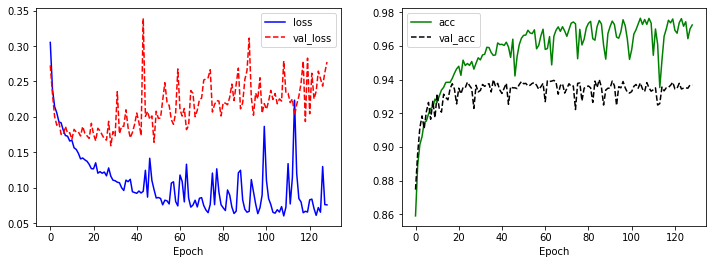

In [14]:
#모델 학습 후 로스값과 정확도의 이미지 처리
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [15]:
#모델 저장 하기 
model.save('fAIshin_P_sneak.h5')

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(500, 500, 3)
########################################
VERSION : 1.1 
 Interesting tools to be added to the workflow pipe!!!
########################################


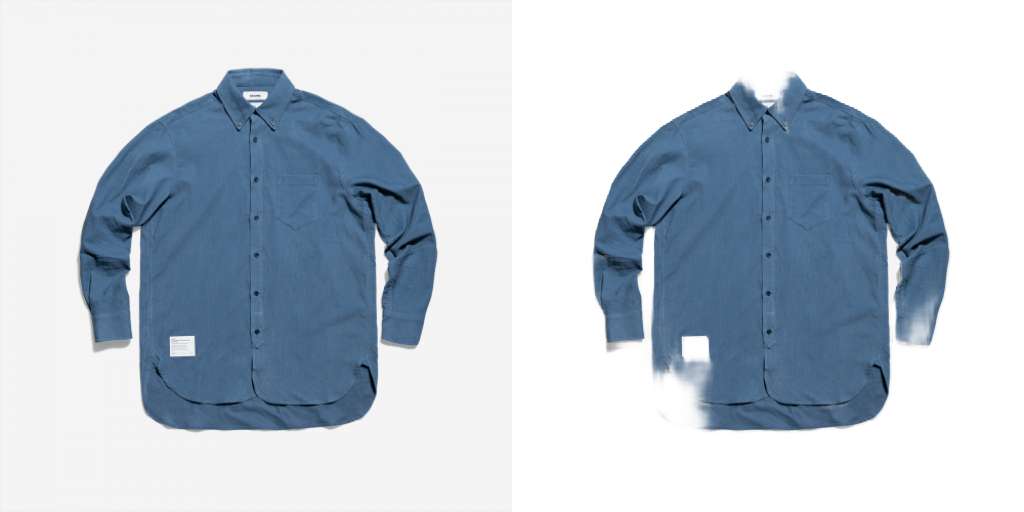

In [17]:
#기존 우리의 openCV를 통해 의류를 분류해 내기

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/drive/My Drive/Colab Notebooks/shirts0_10.jpg'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/Colab Notebooks/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb ----> return PNG"""

        name =  self.imageid
        file = cv2.imread(name)
        print(file.shape)

        # b,g,r= cv2.split(file)
        # file = cv2.merge([b,g,r])

        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        
    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code
api    = fashion_tools(f,saved)
image = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")

# cv2.imwrite('result.jpeg', image_)
cv2_imshow(image)
# print(image.shape)

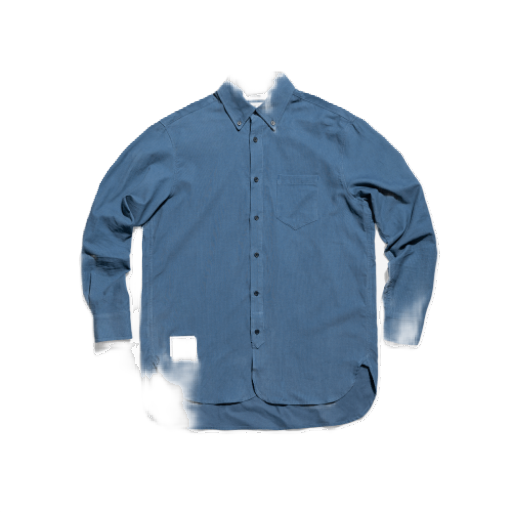

In [18]:
# 이미지 자르고, 투명값 검정배경 입혀주기.

image_crop = image[:,512:]
image_crop = np.uint8(image_crop)
# cv2_imshow(image_crop)

for i in image_crop:
    for j in i:
        if j[3] < 40:
            j[0] = 0
            j[1] = 0
            j[2] = 0

cv2_imshow(image_crop)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 106   0   0 113   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 117 100 134 112 103  91  85   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  98 111 109 111  91 107 110 111 109  94  99   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  45 107 110 111 110 108 114 106 105 112 101  79 107 105   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  34 110  79 110 100 103 106 103 104  98 102 105 109 10

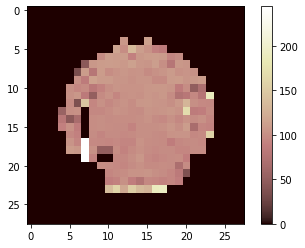

(1, 28, 28)

In [19]:
# 리사이즈 인풋값 맞춰 주기.
image_resize = cv2.resize(image_crop, (28,28))
cv2_imshow(image_resize)

# 그레이 스케일.. 후 픽셀 출력..
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGRA2GRAY)
cv2_imshow(image_gray)
print(image_gray)

# 조금 더 크게 시각화..
plt.imshow(image_gray, cmap='pink')
plt.colorbar()
plt.show()

# 정규화 해준다.
input_image = image_gray/255.0

# input값이 3차원 이여서 차원을 늘려준다.
input_image = np.reshape(input_image, (1,28,28))
input_image.shape

In [20]:
test_X.shape
input_image = input_image.reshape(1,28,28,1)

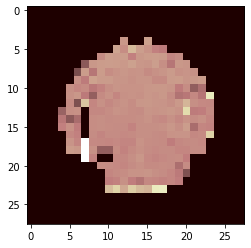

[[1.0089924 1.        1.9910076]]


In [21]:
#예측 수행
input_predict = model.predict(input_image)+1
#예측 이미지 확인 
plt.imshow(input_image.reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인 
print(input_predict)

In [22]:
max_value = np.max(input_predict)
# print(max_value)
max_idx = np.where(input_predict == max_value)
# print(max_idx)
# print(max_idx[1][0])
predict_idx = max_idx[1][0]
predict_idx

2